In [98]:
import tensorflow as tf
#--------------------------------------
print(tf.__version__)
# print(tf.test.is_gpu_available(cuda_only=False, min_cuda_compute_capability=None))

2.2.0


In [99]:
import tensorflow as tf
from tensorflow.keras import backend as k
from tensorflow.keras.layers import Dense, Conv2D, add, BatchNormalization, Dropout, Flatten, Reshape, LeakyReLU
from tensorflow.keras.models import Model 
import cv2
import numpy as np
import pandas as pd
import requests
# from tqdm import tqdm
import os
# from google.colab import drive
from PIL import Image
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

from tensorflow.compat.v1.keras import backend as K
config =  tf.compat.v1.ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 1/3
config.gpu_options.allow_growth = True
sess =  tf.compat.v1.Session(config=config)
K.set_session(sess)

In [100]:
import pandas as pd
import numpy as np
import os
from glob import glob
from PIL import Image

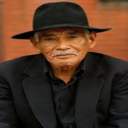

In [101]:
imgs_paths = glob("../UTKface/*.jpg")
im =Image.open(imgs_paths[1]).resize((128,128))
im

In [106]:
max_age = 116
# TRAINING_PATH = os.path.join('..', 'dataset', 'train.csv')
# VALID_PATH = os.path.join('..', 'dataset', 'valid.csv')
# train = pd.read_csv(TRAINING_PATH)
# valid = pd.read_csv(VALID_PATH)
# train.img_path = '../UTKface/'+ train.img_path
# valid.img_path = '../UTKface/'+ valid.img_path
# train.age = np.round(train.age * max_age,0)
# valid.age = np.round(valid.age * max_age,0)
# train.drop(columns='Unnamed: 0', inplace=True)
# valid.drop(columns='Unnamed: 0', inplace=True)
# valid

# Api Model Evaluation

In [107]:
'''

api_dict = {'api_orig_valid_idx':[],'api_img_path':[], 'api_age':[], 'api_gender':[], 
            'api_race':[], 'api_emotion':[], 'api_glass':[],
            'api_hair_color':[], 'api_mask':[]}
start = api_dict['api_orig_valid_idx'][-1]
start = 0
for i in tqdm(range(start, valid.shape[0])):
    try:
        img_path = valid.img_path.loc[i]
        files = {
        "image": (img_path, open(img_path, "rb")),
        }
        response = requests.post(
            "https://192.168.101.151:5000/crowd_Face_recognition_data/",
            files=files,
            verify=False
        )

        if response.ok:
            resp = response.json()
            api_dict['api_orig_valid_idx'].append(i)
            api_dict['api_img_path'].append(img_path)
            api_dict['api_age'].append(resp[1]['faces'][0]['age'])
            api_dict['api_gender'].append(resp[1]['faces'][0]['gender'][0])
            api_dict['api_race'].append( resp[1]['faces'][0]['race'])
            api_dict['api_emotion'].append(resp[1]['faces'][0]['emotion'][0])
            api_dict['api_glass'].append(resp[1]['faces'][0]['glass'])
            api_dict['api_hair_color'].append(resp[1]['faces'][0]['hair_color'])
            api_dict['api_mask'].append(resp[1]['faces'][0]['mask'][0])
    except:
        pass
API_PATH = os.path.join('..', 'dataset', 'Api.csv')  
api_df = pd.DataFrame(api_dict)
api_df.to_csv(API_PATH, index=False)

'''

'\n\napi_dict = {\'api_orig_valid_idx\':[],\'api_img_path\':[], \'api_age\':[], \'api_gender\':[], \n            \'api_race\':[], \'api_emotion\':[], \'api_glass\':[],\n            \'api_hair_color\':[], \'api_mask\':[]}\nstart = api_dict[\'api_orig_valid_idx\'][-1]\nstart = 0\nfor i in tqdm(range(start, valid.shape[0])):\n    try:\n        img_path = valid.img_path.loc[i]\n        files = {\n        "image": (img_path, open(img_path, "rb")),\n        }\n        response = requests.post(\n            "https://192.168.101.151:5000/crowd_Face_recognition_data/",\n            files=files,\n            verify=False\n        )\n\n        if response.ok:\n            resp = response.json()\n            api_dict[\'api_orig_valid_idx\'].append(i)\n            api_dict[\'api_img_path\'].append(img_path)\n            api_dict[\'api_age\'].append(resp[1][\'faces\'][0][\'age\'])\n            api_dict[\'api_gender\'].append(resp[1][\'faces\'][0][\'gender\'][0])\n            api_dict[\'api_race\'].a

In [108]:
df = pd.read_csv('../dataset/Api_GT_cropped_utkface.csv')

In [109]:
api_df = df[['api_age', 'api_gender', 'api_race']]
gt_df = df[['GT_str_age', 'GT_str_gender', 'GT_str_race']]

In [110]:
from sklearn import metrics as mc

In [111]:
print(mc.accuracy_score(gt_df.GT_str_age, api_df.api_age),
mc.accuracy_score(gt_df.GT_str_gender, api_df.api_gender),
mc.accuracy_score(gt_df.GT_str_race, api_df.api_race))

0.1021678471775059 0.7900837089504186 0.29984975316591544


In [112]:
print(mc.classification_report(gt_df.GT_str_age, api_df.api_age))

              precision    recall  f1-score   support

         0-5       0.00      0.00      0.00       426
       10-15       0.00      0.00      0.00       100
       15-20       0.00      0.00      0.00       194
       20-25       0.00      0.00      0.00       445
       25-30       0.30      0.06      0.11       977
       30-35       0.10      0.20      0.13       428
       35-40       0.12      0.53      0.19       455
       40-45       0.06      0.30      0.10       239
       45-50       0.04      0.04      0.04       220
        5-10       0.00      0.00      0.00       194
       50-55       0.06      0.02      0.03       254
       55-60       0.05      0.01      0.01       199
       60-65       0.06      0.01      0.01       147
       65-70       0.00      0.00      0.00       110
       70-75       0.00      0.00      0.00        75
       75-80       0.00      0.00      0.00        74
       80-85       0.00      0.00      0.00        38
       85-90       0.00    

/home/ai/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [113]:
print(mc.classification_report(gt_df.GT_str_gender, api_df.api_gender))

              precision    recall  f1-score   support

      female       0.75      0.85      0.79      2204
        male       0.84      0.74      0.79      2455

    accuracy                           0.79      4659
   macro avg       0.79      0.79      0.79      4659
weighted avg       0.80      0.79      0.79      4659



In [114]:
print(mc.classification_report(gt_df.GT_str_race, api_df.api_race))

                   precision    recall  f1-score   support

          African       0.45      0.17      0.24      2204
            Asian       0.00      0.00      0.00         0
European/American       0.52      0.42      0.47      2455
           Indian       0.00      0.00      0.00         0
            Other       0.00      0.00      0.00         0

         accuracy                           0.30      4659
        macro avg       0.19      0.12      0.14      4659
     weighted avg       0.49      0.30      0.36      4659



/home/ai/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [115]:
df.head()

,api_img_path,api_age,api_gender,api_race,api_emotion,api_glass,api_hair_color,api_mask,GT_age,GT_str_age,GT_gender,GT_str_gender,GT_race,GT_str_race
0,../UTKface/34_0_3_20170119200717205.jpg.chip.jpg,35-40,male,Other,happiness,With Glasses.,#,without_mask,34.0,30-35,0,male,0,European/American
1,../UTKface/28_0_0_20170117202521375.jpg.chip.jpg,25-30,female,European/American,neutral,Without Glasses.,#,without_mask,28.0,25-30,0,male,0,European/American
2,../UTKface/26_1_1_20170116223109423.jpg.chip.jpg,35-40,female,African,happiness,Without Glasses.,#,without_mask,26.0,25-30,1,female,1,African
3,../UTKface/18_1_3_20170119155644533.jpg.chip.jpg,30-35,female,Other,neutral,Without Glasses.,Brown,without_mask,18.0,15-20,1,female,1,African
4,../UTKface/55_0_3_20170119171830808.jpg.chip.jpg,40-45,female,Indian,sadness,Without Glasses.,Gray,with_mask,55.0,55-60,0,male,0,European/American


# Data Generator

In [116]:
iqr, q1 = 22, 23

In [117]:
valid = df[['api_img_path', 'GT_age', 'GT_gender', 'GT_race']]
# q1, q3 = valid.GT_age.quantile([0.25,0.75]).to_list()
# iqr = q3-q1
valid.GT_age = (df.GT_age - q1)/iqr
valid.head()

/home/ai/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,api_img_path,GT_age,GT_gender,GT_race
0,../UTKface/34_0_3_20170119200717205.jpg.chip.jpg,0.500000,0,0
1,../UTKface/28_0_0_20170117202521375.jpg.chip.jpg,0.227273,0,0
2,../UTKface/26_1_1_20170116223109423.jpg.chip.jpg,0.136364,1,1
3,../UTKface/18_1_3_20170119155644533.jpg.chip.jpg,-0.227273,1,1
4,../UTKface/55_0_3_20170119171830808.jpg.chip.jpg,1.454545,0,0


In [118]:
def gen(df, batch_size = 100, w=160, h=160):
  while True:
    samples_range = len(df)//batch_size
    for i in range(samples_range) :
      start = i * batch_size
      end = start + batch_size
      y = [
            np.array(df['GT_age'].loc[start:end-1]), 
            np.array(df['GT_gender'].loc[start:end-1]), 
            np.array(df['GT_race'].loc[start:end-1])
          ]
      x =[]
      for j in range (start, end):
        img = cv2.imread(df.loc[j]['api_img_path'],cv2.IMREAD_COLOR)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img =cv2.resize(img, (w,h) )
        x.append(img)
      x = np.array(x)/255.0
      yield x, y

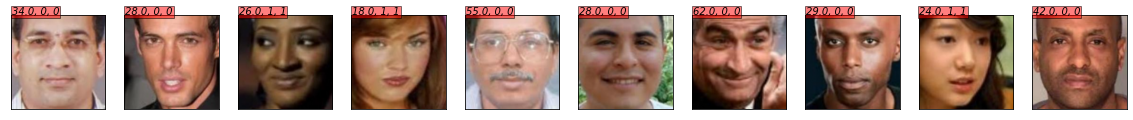

In [119]:
g_valid = gen(valid, batch_size = 20)
x, y = next(g_valid) 
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(0, n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x[i])
    ax.text(0.95, 0.01, '{}, {}, {}'.format(np.round((y[0][i]*iqr+q1),3), y[1][i], y[2][i]), style='italic',
    bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 1})

    # plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()

# Test Models

In [156]:
# model_xception_AGR_cropped , model3, model4_2 , model_AGR_facenet
model = tf.keras.models.load_model('../logs/models/model_AGR_facenet.h5')

In [157]:
batch_size=1
validation_steps = len(valid)//batch_size
valid_set = gen(valid, batch_size = batch_size)
valid_evaluation = model.evaluate(valid_set, steps=validation_steps, verbose=1 )

4659/4659 [==============================] - 94s 20ms/step - loss: 3.8522 - age_out_loss: 0.2342 - gender_out_loss: 0.1754 - race_out_loss: 3.4426 - age_out_acc: 0.0343 - gender_out_acc: 0.9311 - race_out_acc: 0.3524


In [151]:
batch_size=1
validation_steps = len(valid)//batch_size
valid_set = gen(valid, batch_size = batch_size)
valid_pred = model.predict(valid_set, steps=validation_steps, verbose=1)

4659/4659 [==============================] - 66s 14ms/step


In [152]:
valid_pred[0] = np.round((valid_pred[0] * iqr)+q1, 0)
valid_pred[2] = np.argmax(valid_pred[2], axis=1)

In [158]:
mc.mean_absolute_error(valid.GT_age, valid_pred[0])

32.949550235126544

In [159]:
t = valid_pred[1]>0.5
t = t*1
print(mc.classification_report(valid.GT_gender,t))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      2455
           1       0.94      0.91      0.93      2204

    accuracy                           0.93      4659
   macro avg       0.93      0.93      0.93      4659
weighted avg       0.93      0.93      0.93      4659



In [155]:
print(mc.classification_report(valid.GT_race,valid_pred[2]))

              precision    recall  f1-score   support

           0       0.56      0.48      0.52      2455
           1       0.46      0.21      0.29      2204
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.35      4659
   macro avg       0.20      0.14      0.16      4659
weighted avg       0.51      0.35      0.41      4659



/home/ai/anaconda3/envs/tf-gpu/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# FaceNet Model

In [6]:
facenet = tf.keras.models.load_model('../pretrained_models/facenet_keras.h5')
# model = tf.keras.models.load_model('../logs/models/{}.h5'.format('model3'))

In [23]:
valid_m = valid[valid['gender']==0].reset_index()
valid_f = valid[valid['gender']==1].reset_index()
valid_f.head()

,index,img_path,age,gender,race
0,0,../UTKface/22_1_1_20170117141140945.jpg,22.0,1,1
1,4,../UTKface/40_1_0_20170116222656352.jpg,40.0,1,0
2,5,../UTKface/26_1_1_20170116223109423.jpg.chip.jpg,26.0,1,1
3,6,../UTKface/18_1_3_20170119155644533.jpg.chip.jpg,18.0,1,3
4,8,../UTKface/80_1_0_20170110180237499.jpg,80.0,1,0


In [24]:
valid_m_gen = gen(valid_m, batch_size = 100)
valid_f_gen = gen(valid_f, batch_size = 100)
x_m, y_m = next(valid_m_gen)
x_f, y_f = next(valid_m_gen)

In [25]:
z_m = facenet.predict(x_m)
z_f = facenet.predict(x_f)

In [27]:
from sklearn.decomposition import PCA
pca2 = PCA(n_components=2)
pca_m = pca2.fit(z_m)
pca_f = pca2.fit(z_f)
x_y_m = pca_m.transform(z_m)
x_y_f = pca_m.transform(z_f)

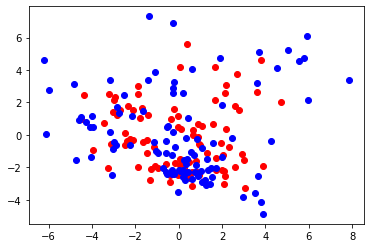

In [30]:
plt.scatter(x_y_m[:,0], x_y_m[:,1], c='r')
plt.scatter(x_y_f[:,0], x_y_f[:,1], c='b')
plt.show()

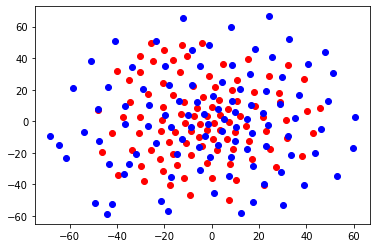

In [34]:
from sklearn.manifold import TSNE
tsne_m = TSNE(n_components=2)
tsne_f = TSNE(n_components=2)
x_y_m = tsne_m.fit_transform(z_m)
x_y_f = tsne_f.fit_transform(z_f)

plt.scatter(x_y_m[:,0], x_y_m[:,1], c='r')
plt.scatter(x_y_f[:,0], x_y_f[:,1], c='b')
plt.show()